In [65]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

sys.path.insert(1, '/home/guilherme-resende/Desktop/mono2/utils')
import qif

In [ ]:
np.random.seed(RANDOM_SEED)

In [66]:
df = pd.read_csv("../data/synthetic_dataset.csv")

In [67]:
df.tail(3)

,f0,f1,f2,f3,f4,target
2997,0,0,1,1,1,1
2998,1,1,0,0,0,1
2999,0,1,0,0,1,1


Divides synthetic data into train and test

In [68]:
train_idx = df.sample(frac=0.8).index
test_idx = df[~df.index.isin(train_idx)].index

X_train = df.iloc[train_idx].drop("target", axis=1)
Y_train = df.loc[train_idx, "target"]

X_test = df.iloc[test_idx].drop("target", axis=1)
Y_test = df.loc[test_idx, "target"]

In [69]:
df_test = df.iloc[test_idx]

In [70]:
xgb = XGBClassifier()

Fit and Predict with the model

In [73]:
xgb.fit(X_train, Y_train)
preds = xgb.predict(X_test)
preds_proba = xgb.predict_proba(X_test)[:, 1:]

df_test.loc[:, "preds_proba"] = preds_proba.reshape(-1)

As expected, the model was always able to predict the correct label.

In [74]:
print(f"F1_Score is {f1_score(Y_test, preds)}, whereas AUC is {roc_auc_score(Y_test, preds_proba)}")

F1_Score is 1.0, whereas AUC is 1.0


### QIF

In [75]:
bayes_leakage = qif.BayesLeakage(df_test)
feature_names = X_test.columns

In [76]:
qif_values = []
for feature in feature_names:
    leakage = bayes_leakage.compute_flows(x=feature, y='preds_proba')
    qif_values.append(leakage[0])

qif_values = np.array(qif_values)
qif_values = qif_values / qif_values.sum() # Normalize

That's a shit

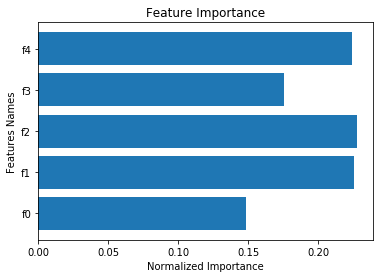

In [81]:
plt.barh(feature_names, qif_values)
plt.title("Feature Importance")
plt.ylabel("Features Names")
plt.xlabel("Normalized Importance")
plt.show()